In [10]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# tickers
tickers = ['LMT', 'RHM', 'NOC', 'THLEF', 'FMN.F']

# download data
data = yf.download(tickers, start='2022-02-24', end='2025-09-10')['Close']

# daily returns
returns = data.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
num_portfolios = 10000

# portfolio simulations
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = portfolio_return / portfolio_stddev

# dataframe
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# optimized portfolios
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_risk_idx = results_df['Risk'].idxmin()

max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
min_risk_portfolio = results_df.loc[min_risk_idx]

# extract optimized weights (Max Sharpe portfolios)
weights_max_sharpe = weights_record[max_sharpe_idx]
print("Pesi del portafoglio Max Sharpe:")
for t, w in zip(tickers, weights_max_sharpe):
    print(f"{t}: {w:.2%}")

[*********************100%***********************]  5 of 5 completed


Pesi del portafoglio Max Sharpe:
LMT: 34.53%
RHM: 0.69%
NOC: 27.86%
THLEF: 12.99%
FMN.F: 23.94%


[*********************100%***********************]  2 of 2 completed


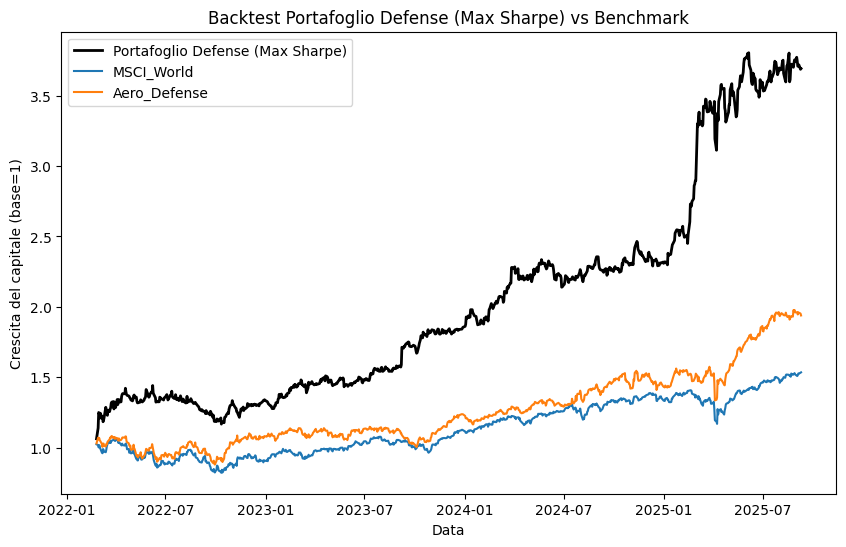


Portafoglio Defense (Max Sharpe):
 Rendimento atteso: 38.53%
 Rischio: 22.54%
MSCI_World - Rendimento atteso: 13.67%, Rischio: 17.33%
Aero_Defense - Rendimento atteso: 20.71%, Rischio: 19.47%


In [11]:
# daily returns optimized portfolio
portfolio_returns = returns @ weights_max_sharpe
portfolio_cum_returns = (1 + portfolio_returns).cumprod()

# benchmark tickers
benchmarks = {
    'MSCI_World': 'URTH',   # ETF MSCI World
    'Aero_Defense': 'ITA'   # ETF Aerospace & Defense
}

bench_data = yf.download(list(benchmarks.values()), start='2022-02-24', end='2025-09-10')['Close']
bench_returns = bench_data.pct_change().dropna()
bench_cum_returns = (1 + bench_returns).cumprod()

# backtest graph
plt.figure(figsize=(10,6))
plt.plot(portfolio_cum_returns, label='Portafoglio Defense (Max Sharpe)', color='black', linewidth=2)
for label, ticker in benchmarks.items():
    plt.plot(bench_cum_returns[ticker], label=label)
plt.title('Backtest Portafoglio Defense (Max Sharpe) vs Benchmark')
plt.xlabel('Data')
plt.ylabel('Crescita del capitale (base=1)')
plt.legend()
plt.show()

# annual results
port_mean_return = portfolio_returns.mean() * 252
port_volatility = portfolio_returns.std() * np.sqrt(252)
print("\nPortafoglio Defense (Max Sharpe):")
print(f" Rendimento atteso: {port_mean_return:.2%}")
print(f" Rischio: {port_volatility:.2%}")

bench_mean_returns = bench_returns.mean() * 252
bench_volatility = bench_returns.std() * np.sqrt(252)
for label, ticker in benchmarks.items():
    print(f"{label} - Rendimento atteso: {bench_mean_returns[ticker]:.2%}, Rischio: {bench_volatility[ticker]:.2%}")